# k-mean clustering California Real State data

## import libraries

In [2]:
import pandas as pd
import numpy as np
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.decomposition import PCA
from sklearn.metrics import silhouette_samples, silhouette_score
%matplotlib inline



In [73]:
from scipy import stats

In [4]:
df = pd.read_csv("C:/Users/germa/OneDrive/Documents/Datasets/California_Houses.csv")

## Exploratory Analysis

In [78]:
df.head()

,Median_House_Value,Median_Income,Median_Age,Tot_Rooms,Tot_Bedrooms,Population,Households,Latitude,Longitude,Distance_to_coast,Distance_to_LA,Distance_to_SanDiego,Distance_to_SanJose,Distance_to_SanFrancisco
0,452600.0,8.3252,41,880,129,322,126,37.88,-122.23,9263.040773,556529.158342,735501.806984,67432.517001,21250.213767
1,358500.0,8.3014,21,7099,1106,2401,1138,37.86,-122.22,10225.733072,554279.850069,733236.884360,65049.908574,20880.600400
2,352100.0,7.2574,52,1467,190,496,177,37.85,-122.24,8259.085109,554610.717069,733525.682937,64867.289833,18811.487450
3,341300.0,5.6431,52,1274,235,558,219,37.85,-122.25,7768.086571,555194.266086,734095.290744,65287.138412,18031.047568
4,342200.0,3.8462,52,1627,280,565,259,37.85,-122.25,7768.086571,555194.266086,734095.290744,65287.138412,18031.047568


In [6]:
df.describe()

,Median_House_Value,Median_Income,Median_Age,Tot_Rooms,Tot_Bedrooms,Population,Households,Latitude,Longitude,Distance_to_coast,Distance_to_LA,Distance_to_SanDiego,Distance_to_SanJose,Distance_to_SanFrancisco
count,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,2.064000e+04,2.064000e+04,20640.000000,20640.000000
mean,206855.816909,3.870671,28.639486,2635.763081,537.898014,1425.476744,499.539680,35.631861,-119.569704,40509.264883,2.694220e+05,3.981649e+05,349187.551219,386688.422291
std,115395.615874,1.899822,12.585558,2181.615252,421.247906,1132.462122,382.329753,2.135952,2.003532,49140.039160,2.477324e+05,2.894006e+05,217149.875026,250122.192316
min,14999.000000,0.499900,1.000000,2.000000,1.000000,3.000000,1.000000,32.540000,-124.350000,120.676447,4.205891e+02,4.849180e+02,569.448118,456.141313
25%,119600.000000,2.563400,18.000000,1447.750000,295.000000,787.000000,280.000000,33.930000,-121.800000,9079.756762,3.211125e+04,1.594264e+05,113119.928682,117395.477505
50%,179700.000000,3.534800,29.000000,2127.000000,435.000000,1166.000000,409.000000,34.260000,-118.490000,20522.019101,1.736675e+05,2.147398e+05,459758.877000,526546.661701
75%,264725.000000,4.743250,37.000000,3148.000000,647.000000,1725.000000,605.000000,37.710000,-118.010000,49830.414479,5.271562e+05,7.057954e+05,516946.490963,584552.007907
max,500001.000000,15.000100,52.000000,39320.000000,6445.000000,35682.000000,6082.000000,41.950000,-114.310000,333804.686371,1.018260e+06,1.196919e+06,836762.678210,903627.663298


In [7]:
colnames=['Median_House_Value','Median_Income','Median_Age','Tot_Rooms','Tot_Bedrooms','Population','Households','Latitude','Longitude','Distance_to_coast','Distance_to_LA','Distance_to_SanDiego','Distance_to_SanJose','Distance_to_SanFrancisco']

In [67]:
df.shape

(20640, 14)

In [112]:
#Total count of data with nulls
total_count = df.isnull().sum()
total_count #we found there are no nulls

Median_House_Value          0
Median_Income               0
Median_Age                  0
Tot_Rooms                   0
Tot_Bedrooms                0
Population                  0
Households                  0
Latitude                    0
Longitude                   0
Distance_to_coast           0
Distance_to_LA              0
Distance_to_SanDiego        0
Distance_to_SanJose         0
Distance_to_SanFrancisco    0
dtype: int64

In [217]:
#lets find outliers
z_scores = np.abs(stats.zscore(df))


In [231]:
total_zscore_outlier = z_scores[stats.zscore(df)>3].count()

In [237]:
percentage_zscore_outlier = total_zscore_outlier / z_scores.count()
round(percentage_zscore_outlier * 100,2)
# we found small percentage of outliers. Tot_Rooms and Tot_Bedrooms have the most outliers.

Median_House_Value          0.00
Median_Income               1.67
Median_Age                  0.00
Tot_Rooms                   1.81
Tot_Bedrooms                1.80
Population                  1.66
Households                  1.76
Latitude                    0.00
Longitude                   0.00
Distance_to_coast           1.22
Distance_to_LA              0.01
Distance_to_SanDiego        0.00
Distance_to_SanJose         0.00
Distance_to_SanFrancisco    0.00
dtype: float64

In [156]:
total_zscore_outlier

Median_House_Value            0
Median_Income               345
Median_Age                    0
Tot_Rooms                   373
Tot_Bedrooms                371
Population                  342
Households                  363
Latitude                      0
Longitude                     0
Distance_to_coast           251
Distance_to_LA                3
Distance_to_SanDiego          0
Distance_to_SanJose           0
Distance_to_SanFrancisco      0
dtype: int64

There are several outliers

In [244]:
#create a DataFrame filtering out the outliers. The term .all returns all the values in the column that are true for the condition
# to filter the DataFrame df, I apply the function zscore to the df, which will calculate the z-score for each member of df and
# and then use this result to filter. I could have just use the variable z-scores that I created before to collect these results
# to make the code more readable
df1=df[(z_scores<3).all(axis=1)]
#df1=df[(np.abs(stats.zscore(df))<3).all(axis=1)]


In [241]:
df.shape

(20640, 14)

In [245]:
df1.shape

(19497, 14)

In [275]:
df.describe()

,Median_House_Value,Median_Income,Median_Age,Tot_Rooms,Tot_Bedrooms,Population,Households,Latitude,Longitude,Distance_to_coast,Distance_to_LA,Distance_to_SanDiego,Distance_to_SanJose,Distance_to_SanFrancisco
count,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,2.064000e+04,2.064000e+04,20640.000000,20640.000000
mean,206855.816909,3.870671,28.639486,2635.763081,537.898014,1425.476744,499.539680,35.631861,-119.569704,40509.264883,2.694220e+05,3.981649e+05,349187.551219,386688.422291
std,115395.615874,1.899822,12.585558,2181.615252,421.247906,1132.462122,382.329753,2.135952,2.003532,49140.039160,2.477324e+05,2.894006e+05,217149.875026,250122.192316
min,14999.000000,0.499900,1.000000,2.000000,1.000000,3.000000,1.000000,32.540000,-124.350000,120.676447,4.205891e+02,4.849180e+02,569.448118,456.141313
25%,119600.000000,2.563400,18.000000,1447.750000,295.000000,787.000000,280.000000,33.930000,-121.800000,9079.756762,3.211125e+04,1.594264e+05,113119.928682,117395.477505
50%,179700.000000,3.534800,29.000000,2127.000000,435.000000,1166.000000,409.000000,34.260000,-118.490000,20522.019101,1.736675e+05,2.147398e+05,459758.877000,526546.661701
75%,264725.000000,4.743250,37.000000,3148.000000,647.000000,1725.000000,605.000000,37.710000,-118.010000,49830.414479,5.271562e+05,7.057954e+05,516946.490963,584552.007907
max,500001.000000,15.000100,52.000000,39320.000000,6445.000000,35682.000000,6082.000000,41.950000,-114.310000,333804.686371,1.018260e+06,1.196919e+06,836762.678210,903627.663298


In [216]:
df1.describe()

,Median_House_Value,Median_Income,Median_Age,Tot_Rooms,Tot_Bedrooms,Population,Households,Latitude,Longitude,Distance_to_coast,Distance_to_LA,Distance_to_SanDiego,Distance_to_SanJose,Distance_to_SanFrancisco
count,19497.000000,19497.000000,19497.000000,19497.000000,19497.000000,19497.000000,19497.000000,19497.000000,19497.000000,19497.000000,1.949700e+04,1.949700e+04,19497.000000,19497.000000
mean,203202.813766,3.735551,29.120737,2394.322614,494.870903,1316.755757,462.234036,35.619944,-119.585389,38527.064118,2.687936e+05,3.975369e+05,348208.807794,385546.246695
std,110588.666616,1.604753,12.414050,1437.435875,292.092389,774.051936,268.222188,2.127759,2.007637,45336.996871,2.475577e+05,2.893563e+05,217880.579310,251163.030882
min,14999.000000,0.499900,1.000000,2.000000,2.000000,3.000000,2.000000,32.540000,-124.350000,120.676447,4.205891e+02,4.849180e+02,569.448118,456.141313
25%,119400.000000,2.550900,19.000000,1431.000000,294.000000,785.000000,279.000000,33.930000,-121.810000,8966.755320,3.150859e+04,1.593131e+05,110858.225673,115477.021110
50%,178500.000000,3.506000,29.000000,2084.000000,429.000000,1154.000000,405.000000,34.250000,-118.490000,20290.687709,1.732957e+05,2.128651e+05,460565.033439,527742.823215
75%,260300.000000,4.662900,37.000000,3032.000000,627.000000,1678.000000,587.000000,37.720000,-118.020000,47535.632455,5.279704e+05,7.066906e+05,516615.641374,584268.035325
max,500001.000000,9.556100,52.000000,9179.000000,1797.000000,4818.000000,1644.000000,41.950000,-114.310000,187859.724263,1.011469e+06,1.190400e+06,836762.678210,903627.663298


In [298]:
# calculating the z-scores from the reduced df1. z-scores are the distance to the mean in standard deviations.
# the new df1 will have also outliers respect of their own means. 
z_scores[stats.zscore(df1)>3].count()

Median_House_Value            0
Median_Income               145
Median_Age                    0
Tot_Rooms                   342
Tot_Bedrooms                318
Population                  298
Households                  302
Latitude                      0
Longitude                     0
Distance_to_coast           510
Distance_to_LA                1
Distance_to_SanDiego          0
Distance_to_SanJose           0
Distance_to_SanFrancisco      0
dtype: int64

In [265]:
z_scores1 = np.abs(stats.zscore(df1))

In [290]:
df2 = df1[(z_scores1<3).all(axis=1)] 

In [292]:
df2.describe()

,Median_House_Value,Median_Income,Median_Age,Tot_Rooms,Tot_Bedrooms,Population,Households,Latitude,Longitude,Distance_to_coast,Distance_to_LA,Distance_to_SanDiego,Distance_to_SanJose,Distance_to_SanFrancisco
count,18191.000000,18191.000000,18191.000000,18191.000000,18191.000000,18191.000000,18191.000000,18191.000000,18191.000000,18191.000000,1.819100e+04,1.819100e+04,18191.000000,18191.000000
mean,203902.620032,3.711317,29.615249,2250.719367,466.410313,1245.935847,437.034193,35.590666,-119.588668,34846.429005,2.675148e+05,3.950211e+05,350963.689201,387783.191390
std,108645.344400,1.545156,12.337088,1217.482482,248.241503,666.505197,229.323064,2.141745,2.032509,39660.155242,2.499267e+05,2.920795e+05,219705.857130,253735.894611
min,14999.000000,0.499900,1.000000,2.000000,2.000000,3.000000,2.000000,32.540000,-124.350000,120.676447,4.205891e+02,4.849180e+02,569.448118,456.141313
25%,122550.000000,2.559000,19.000000,1399.000000,290.000000,774.000000,275.000000,33.920000,-121.840000,8652.536848,3.058213e+04,1.584804e+05,103234.386362,111171.755546
50%,180300.000000,3.512500,30.000000,2031.000000,420.000000,1131.000000,397.000000,34.220000,-118.450000,19742.553791,1.675215e+05,2.079366e+05,466042.947160,532761.469769
75%,260200.000000,4.642650,38.000000,2904.500000,604.000000,1613.500000,565.000000,37.730000,-118.000000,42128.832727,5.300707e+05,7.086278e+05,517808.644425,585610.188841
max,500001.000000,8.549100,52.000000,6698.000000,1371.000000,3637.000000,1266.000000,41.950000,-114.310000,174518.054147,1.005590e+06,1.184380e+06,836762.678210,903627.663298


array([[<AxesSubplot:title={'center':'Median_House_Value'}>,
        <AxesSubplot:title={'center':'Median_Income'}>,
        <AxesSubplot:title={'center':'Median_Age'}>,
        <AxesSubplot:title={'center':'Tot_Rooms'}>],
       [<AxesSubplot:title={'center':'Tot_Bedrooms'}>,
        <AxesSubplot:title={'center':'Population'}>,
        <AxesSubplot:title={'center':'Households'}>,
        <AxesSubplot:title={'center':'Latitude'}>],
       [<AxesSubplot:title={'center':'Longitude'}>,
        <AxesSubplot:title={'center':'Distance_to_coast'}>,
        <AxesSubplot:title={'center':'Distance_to_LA'}>,
        <AxesSubplot:title={'center':'Distance_to_SanDiego'}>],
       [<AxesSubplot:title={'center':'Distance_to_SanJose'}>,
        <AxesSubplot:title={'center':'Distance_to_SanFrancisco'}>,
        <AxesSubplot:>, <AxesSubplot:>]], dtype=object)

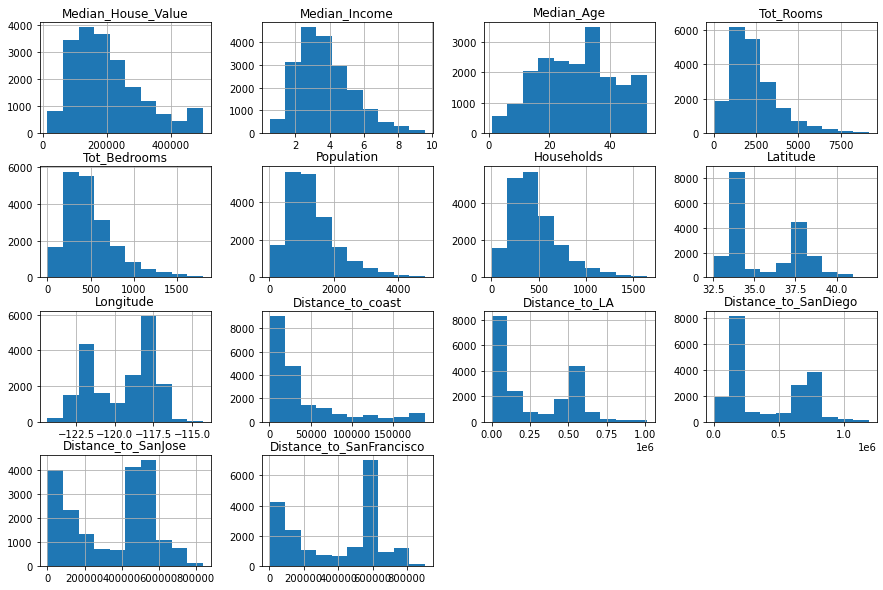

In [207]:
df1.hist(figsize=(15,10))

In [110]:
#z_scores.to_csv('C:\\Users\\germa\\Downloads\\z_scores.csv')
#exporting the data so I can analyze in Excel

array([[<AxesSubplot:title={'center':'Median_House_Value'}>,
        <AxesSubplot:title={'center':'Median_Income'}>,
        <AxesSubplot:title={'center':'Median_Age'}>,
        <AxesSubplot:title={'center':'Tot_Rooms'}>],
       [<AxesSubplot:title={'center':'Tot_Bedrooms'}>,
        <AxesSubplot:title={'center':'Population'}>,
        <AxesSubplot:title={'center':'Households'}>,
        <AxesSubplot:title={'center':'Latitude'}>],
       [<AxesSubplot:title={'center':'Longitude'}>,
        <AxesSubplot:title={'center':'Distance_to_coast'}>,
        <AxesSubplot:title={'center':'Distance_to_LA'}>,
        <AxesSubplot:title={'center':'Distance_to_SanDiego'}>],
       [<AxesSubplot:title={'center':'Distance_to_SanJose'}>,
        <AxesSubplot:title={'center':'Distance_to_SanFrancisco'}>,
        <AxesSubplot:>, <AxesSubplot:>]], dtype=object)

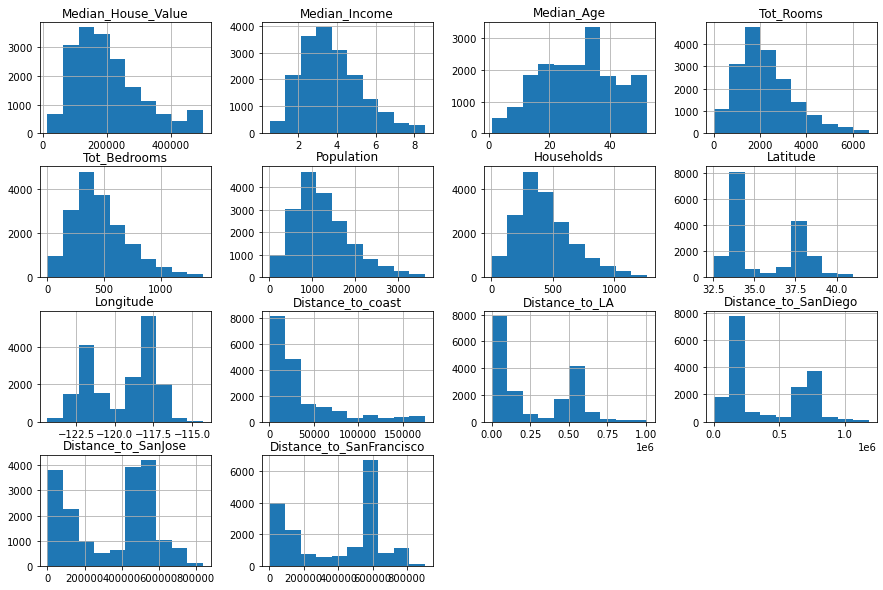

In [299]:
df2.hist(figsize=(15,10))

array([[<AxesSubplot:title={'center':'Median_House_Value'}>,
        <AxesSubplot:title={'center':'Median_Income'}>,
        <AxesSubplot:title={'center':'Median_Age'}>,
        <AxesSubplot:title={'center':'Tot_Rooms'}>],
       [<AxesSubplot:title={'center':'Tot_Bedrooms'}>,
        <AxesSubplot:title={'center':'Population'}>,
        <AxesSubplot:title={'center':'Households'}>,
        <AxesSubplot:title={'center':'Latitude'}>],
       [<AxesSubplot:title={'center':'Longitude'}>,
        <AxesSubplot:title={'center':'Distance_to_coast'}>,
        <AxesSubplot:title={'center':'Distance_to_LA'}>,
        <AxesSubplot:title={'center':'Distance_to_SanDiego'}>],
       [<AxesSubplot:title={'center':'Distance_to_SanJose'}>,
        <AxesSubplot:title={'center':'Distance_to_SanFrancisco'}>,
        <AxesSubplot:>, <AxesSubplot:>]], dtype=object)

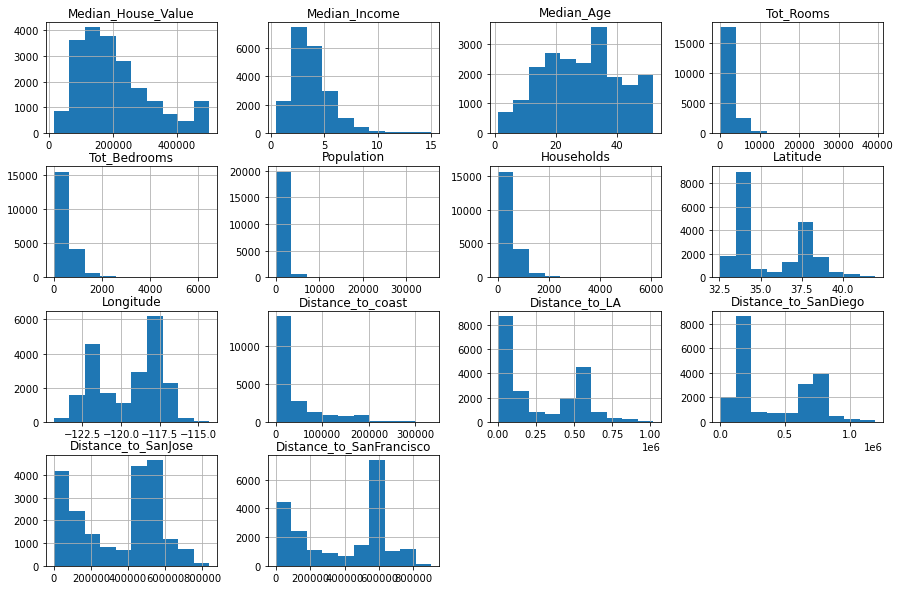

In [13]:
df.hist(figsize=(15,10))

## Standardization (x -  mean)/std_dev

In [16]:
scaler = StandardScaler() #bring the class StandardScaler

In [17]:
scaler.fit(df) #fit in the df

StandardScaler()

In [18]:
scaled = scaler.transform(df)

In [19]:
scaled

array([[ 2.12963148,  2.34476576,  0.98214266, ...,  1.16566824,
        -1.29754558, -1.46107412],
       [ 1.31415614,  2.33223796, -0.60701891, ...,  1.1578418 ,
        -1.30851803, -1.46255188],
       [ 1.25869341,  1.7826994 ,  1.85618152, ...,  1.15883974,
        -1.30935903, -1.47082449],
       ...,
       [-0.99274649, -1.14259331, -0.92485123, ...,  1.49462431,
        -0.50204022, -0.69803768],
       [-1.05860847, -1.05458292, -0.84539315, ...,  1.50835264,
        -0.51115099, -0.71472888],
       [-1.01787803, -0.78012947, -1.00430931, ...,  1.47689622,
        -0.5337677 , -0.72452362]])

In [20]:
scaled_df = pd.DataFrame(data=scaled, columns=colnames)

In [21]:
scaled_df

,Median_House_Value,Median_Income,Median_Age,Tot_Rooms,Tot_Bedrooms,Population,Households,Latitude,Longitude,Distance_to_coast,Distance_to_LA,Distance_to_SanDiego,Distance_to_SanJose,Distance_to_SanFrancisco
0,2.129631,2.344766,0.982143,-0.804819,-0.970706,-0.974429,-0.977033,1.052548,-1.327835,-0.635876,1.158969,1.165668,-1.297546,-1.461074
1,1.314156,2.332238,-0.607019,2.045890,1.348649,0.861439,1.669961,1.043185,-1.322844,-0.616285,1.149889,1.157842,-1.308518,-1.462552
2,1.258693,1.782699,1.856182,-0.535746,-0.825895,-0.820777,-0.843637,1.038503,-1.332827,-0.656307,1.151224,1.158840,-1.309359,-1.470824
3,1.165100,0.932968,1.856182,-0.624215,-0.719067,-0.766028,-0.733781,1.038503,-1.337818,-0.666299,1.153580,1.160808,-1.307426,-1.473945
4,1.172900,-0.012881,1.856182,-0.462404,-0.612239,-0.759847,-0.629157,1.038503,-1.337818,-0.666299,1.153580,1.160808,-1.307426,-1.473945
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
20635,-1.115804,-1.216128,-0.289187,-0.444985,-0.389087,-0.512592,-0.443449,1.801647,-0.758826,2.473038,1.554570,1.494389,-0.463643,-0.655969
20636,-1.124470,-0.691593,-0.845393,-0.888704,-0.920853,-0.944405,-1.008420,1.806329,-0.818722,2.440761,1.575629,1.513790,-0.471288,-0.673183
20637,-0.992746,-1.142593,-0.924851,-0.174995,-0.125578,-0.369537,-0.174042,1.778237,-0.823713,2.304594,1.552601,1.494624,-0.502040,-0.698038
20638,-1.058608,-1.054583,-0.845393,-0.355600,-0.305998,-0.604429,-0.393753,1.778237,-0.873626,2.268994,1.567358,1.508353,-0.511151,-0.714729


array([[<AxesSubplot:title={'center':'Median_House_Value'}>,
        <AxesSubplot:title={'center':'Median_Income'}>,
        <AxesSubplot:title={'center':'Median_Age'}>,
        <AxesSubplot:title={'center':'Tot_Rooms'}>],
       [<AxesSubplot:title={'center':'Tot_Bedrooms'}>,
        <AxesSubplot:title={'center':'Population'}>,
        <AxesSubplot:title={'center':'Households'}>,
        <AxesSubplot:title={'center':'Latitude'}>],
       [<AxesSubplot:title={'center':'Longitude'}>,
        <AxesSubplot:title={'center':'Distance_to_coast'}>,
        <AxesSubplot:title={'center':'Distance_to_LA'}>,
        <AxesSubplot:title={'center':'Distance_to_SanDiego'}>],
       [<AxesSubplot:title={'center':'Distance_to_SanJose'}>,
        <AxesSubplot:title={'center':'Distance_to_SanFrancisco'}>,
        <AxesSubplot:>, <AxesSubplot:>]], dtype=object)

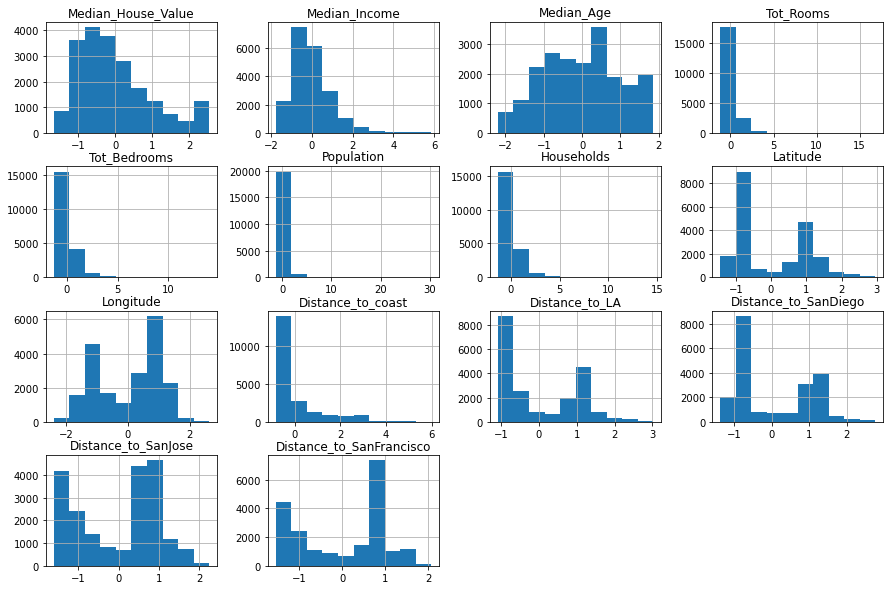

In [25]:
scaled_df.hist(figsize=(15,10))

## k-mean clustering

In [26]:
model1 = KMeans(n_clusters=4) #created model
model1.fit(scaled) #fit model to the scaled data

KMeans(n_clusters=4)

In [27]:
model1_predicted = model1.predict(scaled) 

In [28]:
centroids1 = model1.cluster_centers_ #generate centroids

In [29]:
centroids1 #centroids for 4 clusters along 14 features

array([[ 0.18866363,  0.13362241,  0.21101546, -0.10989718, -0.14890573,
        -0.18775803, -0.13231212,  1.04739059, -1.23169228, -0.39036815,
         1.1199186 ,  1.13076345, -1.20897407, -1.24092734],
       [ 0.1222267 ,  0.05227047,  0.08146371, -0.18321318, -0.16143458,
        -0.10771578, -0.15620427, -0.83943664,  0.79937498, -0.30343477,
        -0.82474843, -0.84326225,  0.82154935,  0.83467003],
       [-0.99300126, -0.61646217, -0.37906042, -0.25746277, -0.28168183,
        -0.31389402, -0.33692504,  0.9641922 , -0.37153214,  2.17183327,
         0.72623461,  0.7834737 , -0.49130279, -0.47231428],
       [ 0.09077874,  0.17826445, -1.03662317,  2.82001835,  2.89151997,
         2.69324489,  2.87737475, -0.33439029,  0.37632867,  0.00410509,
        -0.33065948, -0.35148922,  0.32075306,  0.33496243]])

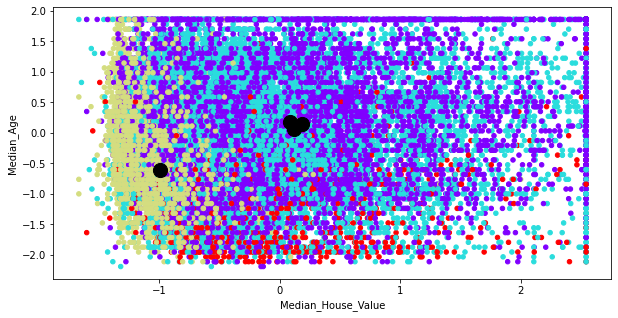

In [34]:
plt.figure(figsize=(10,5))
plt.xlabel('Median_House_Value')
plt.ylabel('Median_Age')
plt.scatter(scaled[:,0],scaled[:,2],c=model1_predicted, s=20, cmap='rainbow') # Median_House_Value vs Median_Age
plt.scatter(centroids1[:,0],centroids1[:,1],c='black',s=200,alpha=1)

## elbow method to find optimal number of clusters

In [36]:
k_rng = range(1,10)
sse = []
for k in k_rng:
    k_model = KMeans(n_clusters=k)
    k_model.fit(scaled)
    sse.append(k_model.inertia_)

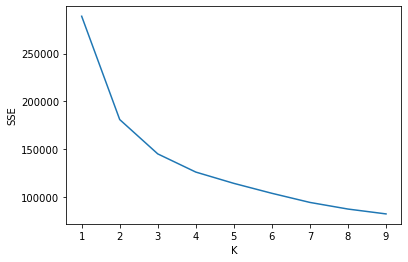

In [38]:
plt.xlabel('K')
plt.ylabel('SSE')
plt.plot(k_rng,sse)

    2 or 3 clusters are ok. We will use 3 clusters

## silhouette method to find the clusters

For n_clusters = 2 The average silhouette_score is : 0.39619387902217207
For n_clusters = 3 The average silhouette_score is : 0.40809093795303514
For n_clusters = 4 The average silhouette_score is : 0.36832876310877133
For n_clusters = 5 The average silhouette_score is : 0.271106734724756
For n_clusters = 6 The average silhouette_score is : 0.2664699155028124


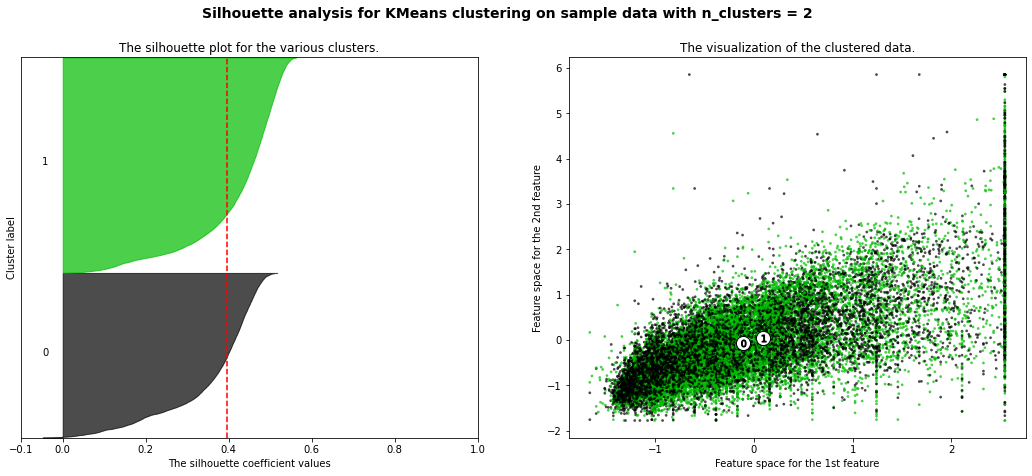

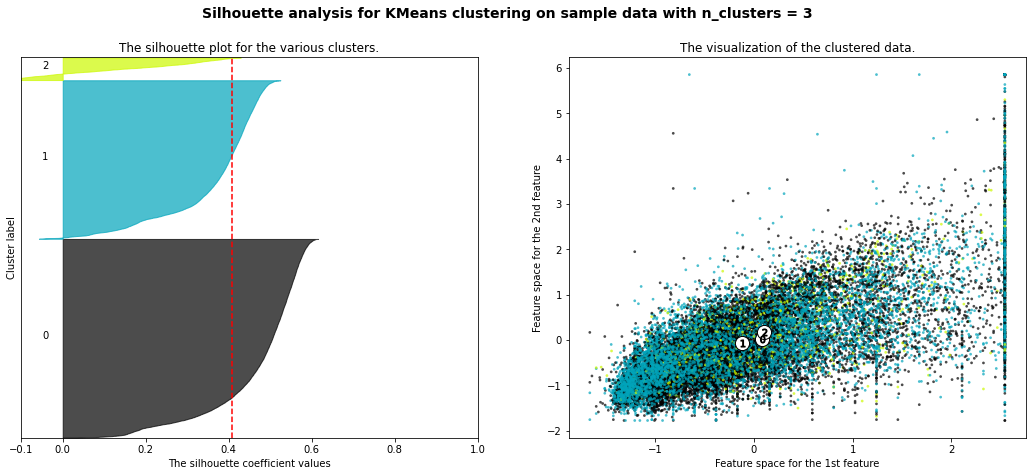

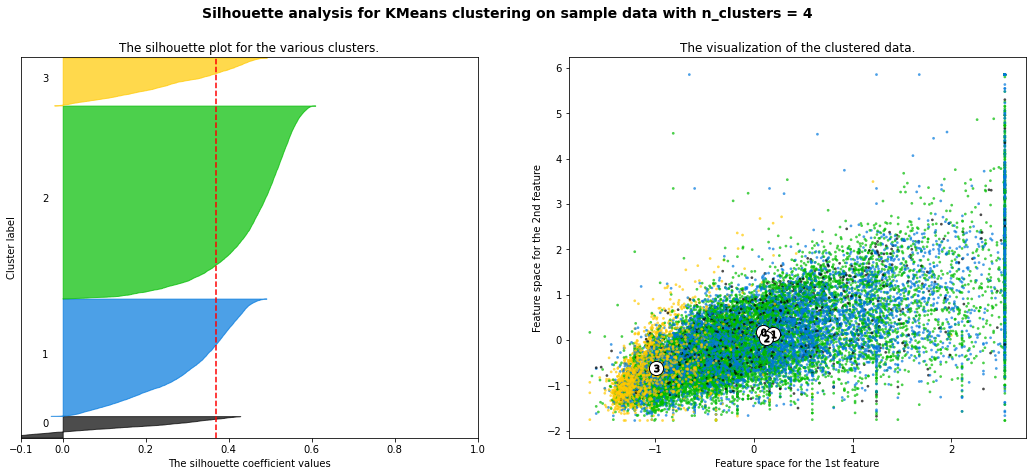

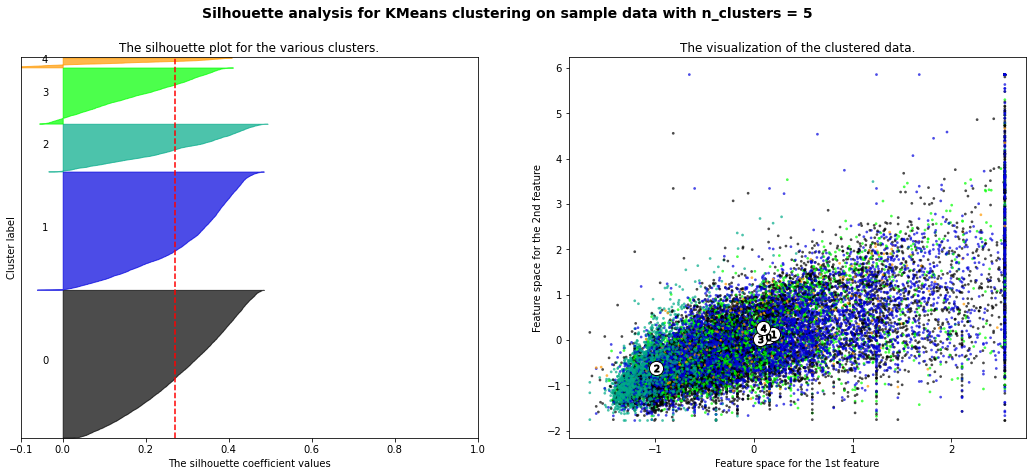

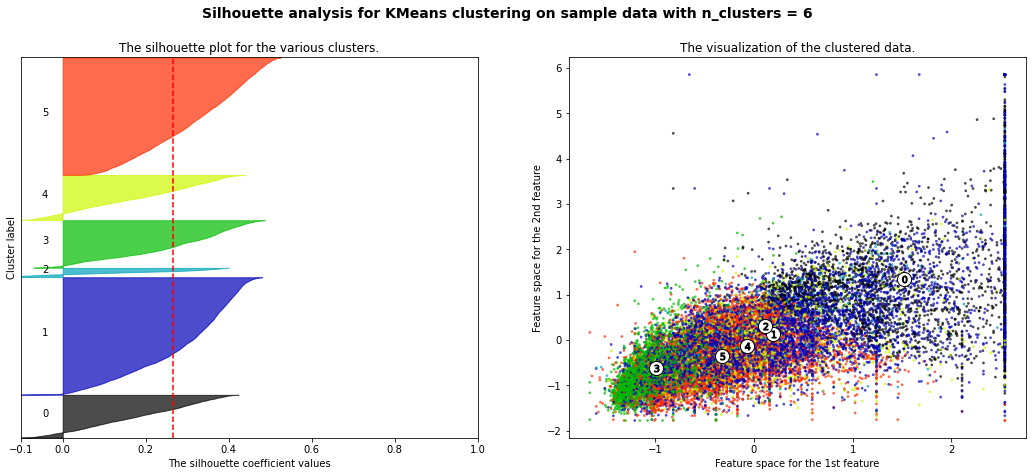

In [39]:
import matplotlib.cm as cm
import matplotlib.style as style

range_n_clusters = [2, 3, 4, 5, 6]
silhouette_avg_n_clusters = []

for n_clusters in range_n_clusters:
    # Create a subplot with 1 row and 2 columns
    fig, (ax1, ax2) = plt.subplots(1, 2)
    fig.set_size_inches(18, 7)

    # The 1st subplot is the silhouette plot
    # The silhouette coefficient can range from -1, 1 but in this example all
    # lie within [-0.1, 1]
    ax1.set_xlim([-0.1, 1])
    # The (n_clusters+1)*10 is for inserting blank space between silhouette
    # plots of individual clusters, to demarcate them clearly.
    ax1.set_ylim([0, len(scaled) + (n_clusters + 1) * 10])

    # Initialize the clusterer with n_clusters value and a random generator
    # seed of 10 for reproducibility.
    clusterer = KMeans(n_clusters=n_clusters, random_state=42)
    cluster_labels = clusterer.fit_predict(scaled)

    # The silhouette_score gives the average value for all the samples.
    # This gives a perspective into the density and separation of the formed
    # clusters
    silhouette_avg = silhouette_score(scaled, cluster_labels)
    print("For n_clusters =", n_clusters,
          "The average silhouette_score is :", silhouette_avg)

    silhouette_avg_n_clusters.append(silhouette_avg)
    # Compute the silhouette scores for each sample
    sample_silhouette_values = silhouette_samples(scaled, cluster_labels)

    y_lower = 10
    for i in range(n_clusters):
        # Aggregate the silhouette scores for samples belonging to
        # cluster i, and sort them
        ith_cluster_silhouette_values = \
            sample_silhouette_values[cluster_labels == i]

        ith_cluster_silhouette_values.sort()

        size_cluster_i = ith_cluster_silhouette_values.shape[0]
        y_upper = y_lower + size_cluster_i

        color = cm.nipy_spectral(float(i) / n_clusters)
        ax1.fill_betweenx(np.arange(y_lower, y_upper),
                          0, ith_cluster_silhouette_values,
                          facecolor=color, edgecolor=color, alpha=0.7)

        # Label the silhouette plots with their cluster numbers at the middle
        ax1.text(-0.05, y_lower + 0.5 * size_cluster_i, str(i))

        # Compute the new y_lower for next plot
        y_lower = y_upper + 10  # 10 for the 0 samples

    ax1.set_title("The silhouette plot for the various clusters.")
    ax1.set_xlabel("The silhouette coefficient values")
    ax1.set_ylabel("Cluster label")

    # The vertical line for average silhouette score of all the values
    ax1.axvline(x=silhouette_avg, color="red", linestyle="--")

    ax1.set_yticks([])  # Clear the yaxis labels / ticks
    ax1.set_xticks([-0.1, 0, 0.2, 0.4, 0.6, 0.8, 1])

    # 2nd Plot showing the actual clusters formed
    colors = cm.nipy_spectral(cluster_labels.astype(float) / n_clusters)
    ax2.scatter(scaled[:, 0], scaled[:, 1], marker='.', s=30, lw=0, alpha=0.7,
                c=colors, edgecolor='k')

    # Labeling the clusters
    centers = clusterer.cluster_centers_
    # Draw white circles at cluster centers
    ax2.scatter(centers[:, 0], centers[:, 1], marker='o',
                c="white", alpha=1, s=200, edgecolor='k')

    for i, c in enumerate(centers):
        ax2.scatter(c[0], c[1], marker='$%d$' % i, alpha=1,
                    s=50, edgecolor='k')

    ax2.set_title("The visualization of the clustered data.")
    ax2.set_xlabel("Feature space for the 1st feature")
    ax2.set_ylabel("Feature space for the 2nd feature")

    plt.suptitle(("Silhouette analysis for KMeans clustering on sample data "
                  "with n_clusters = %d" % n_clusters),
                 fontsize=14, fontweight='bold')

plt.show()

In [40]:
model2 = KMeans(n_clusters=5)
# model2.fit(scaled) ... don't need to use this. fit_predict does fit the data and do the prediction
model2_predicted = model2.fit_predict(scaled)
centroids2 = model2.cluster_centers_

In [41]:
model2_predicted

array([2, 2, 2, ..., 4, 4, 4])

In [42]:
centroids2

array([[ 0.14003257,  0.06162485,  0.28285026, -0.39514489, -0.40233082,
        -0.33447924, -0.39255512, -0.83463103,  0.77993057, -0.33337003,
        -0.83777411, -0.83491734,  0.80632952,  0.82147408],
       [ 0.09610121,  0.27237661, -1.16396392,  4.06615103,  4.03718611,
         3.81708008,  4.03025428, -0.09953007,  0.15173481,  0.0377989 ,
        -0.08574545, -0.11452468,  0.09067701,  0.09745536],
       [ 0.18856344,  0.13616474,  0.19848195, -0.08448811, -0.12330191,
        -0.16215372, -0.10533198,  1.05051814, -1.23194386, -0.38757546,
         1.12226085,  1.13284427, -1.21186317, -1.24362086],
       [ 0.06181273,  0.03065386, -0.63966186,  0.72882411,  0.85464853,
         0.82371947,  0.83986611, -0.82827383,  0.83779313, -0.16038391,
        -0.77244717, -0.84376609,  0.83587752,  0.84692723],
       [-0.99461717, -0.62142364, -0.37477807, -0.26718732, -0.29075219,
        -0.3227405 , -0.34679179,  0.97927374, -0.38177735,  2.17598187,
         0.74254022,  0.79

In [43]:
scaled_df = pd.DataFrame(data=scaled, columns=colnames)

In [44]:
scaled_df['cluster']=model2_predicted #add a column for the cluster

In [45]:
scaled_df.loc[scaled_df['cluster']==0] #filter for the cluster 0

,Median_House_Value,Median_Income,Median_Age,Tot_Rooms,Tot_Bedrooms,Population,Households,Latitude,Longitude,Distance_to_coast,Distance_to_LA,Distance_to_SanDiego,Distance_to_SanJose,Distance_to_SanFrancisco,cluster
2665,-1.265727,-1.048214,0.743768,-0.599920,-0.654970,-0.566458,-0.702394,-1.176020,2.021332,0.232666,0.013439,-0.824221,1.820613,1.699742,0
2666,-1.329856,-0.898880,-0.845393,-0.699848,-0.605117,-0.370420,-0.644851,-1.171338,2.021332,0.254866,0.011686,-0.823156,1.817269,1.696795,0
2667,-1.387918,-0.931516,-0.607019,-0.738811,-0.759424,-0.472854,-0.699779,-1.176020,2.026323,0.229120,0.016898,-0.821125,1.823861,1.702529,0
2668,-1.445981,-1.511058,0.346478,-0.642550,-0.391461,-0.572639,-0.527149,-1.143247,2.051280,0.374282,0.022491,-0.797927,1.816928,1.696030,0
2669,-1.417383,-1.166175,0.267020,-0.293718,-0.035367,-0.314788,-0.234201,-1.119837,2.026323,0.497199,-0.003028,-0.806831,1.784056,1.667423,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
20500,0.174571,1.216896,-0.130270,-0.508243,-0.754676,-0.591184,-0.715472,-0.623560,0.434096,-0.195542,-0.884891,-0.592538,0.434668,0.499197,0
20501,1.110504,1.409445,-0.686477,-0.481198,-0.833017,-0.641518,-0.759938,-0.623560,0.429105,-0.189651,-0.881776,-0.590518,0.431978,0.496843,0
20502,1.023843,-0.467724,1.299975,-1.152735,-1.217598,-1.199607,-1.235978,-0.609514,0.444079,-0.139787,-0.883158,-0.587570,0.428270,0.493721,0
20503,1.067174,2.320289,-0.130270,-0.963421,-1.075160,-1.044190,-1.105198,-0.609514,0.409140,-0.116139,-0.862005,-0.573539,0.409367,0.477195,0


In [46]:
scaled_df_cluster0 = scaled_df[scaled_df['cluster']==0]

array([[<AxesSubplot:title={'center':'Median_House_Value'}>,
        <AxesSubplot:title={'center':'Median_Income'}>,
        <AxesSubplot:title={'center':'Median_Age'}>,
        <AxesSubplot:title={'center':'Tot_Rooms'}>],
       [<AxesSubplot:title={'center':'Tot_Bedrooms'}>,
        <AxesSubplot:title={'center':'Population'}>,
        <AxesSubplot:title={'center':'Households'}>,
        <AxesSubplot:title={'center':'Latitude'}>],
       [<AxesSubplot:title={'center':'Longitude'}>,
        <AxesSubplot:title={'center':'Distance_to_coast'}>,
        <AxesSubplot:title={'center':'Distance_to_LA'}>,
        <AxesSubplot:title={'center':'Distance_to_SanDiego'}>],
       [<AxesSubplot:title={'center':'Distance_to_SanJose'}>,
        <AxesSubplot:title={'center':'Distance_to_SanFrancisco'}>,
        <AxesSubplot:title={'center':'cluster'}>, <AxesSubplot:>]],
      dtype=object)

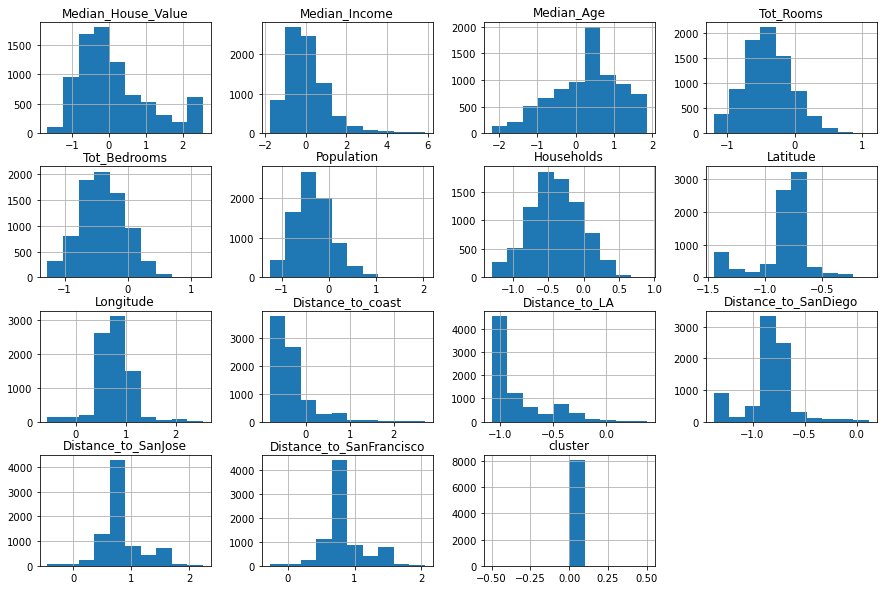

In [51]:
scaled_df_cluster0.hist(figsize=(15,10))

In [48]:
scaled_df_cluster4 = scaled_df[scaled_df['cluster']==4]

array([[<AxesSubplot:title={'center':'Median_House_Value'}>,
        <AxesSubplot:title={'center':'Median_Income'}>,
        <AxesSubplot:title={'center':'Median_Age'}>,
        <AxesSubplot:title={'center':'Tot_Rooms'}>],
       [<AxesSubplot:title={'center':'Tot_Bedrooms'}>,
        <AxesSubplot:title={'center':'Population'}>,
        <AxesSubplot:title={'center':'Households'}>,
        <AxesSubplot:title={'center':'Latitude'}>],
       [<AxesSubplot:title={'center':'Longitude'}>,
        <AxesSubplot:title={'center':'Distance_to_coast'}>,
        <AxesSubplot:title={'center':'Distance_to_LA'}>,
        <AxesSubplot:title={'center':'Distance_to_SanDiego'}>],
       [<AxesSubplot:title={'center':'Distance_to_SanJose'}>,
        <AxesSubplot:title={'center':'Distance_to_SanFrancisco'}>,
        <AxesSubplot:title={'center':'cluster'}>, <AxesSubplot:>]],
      dtype=object)

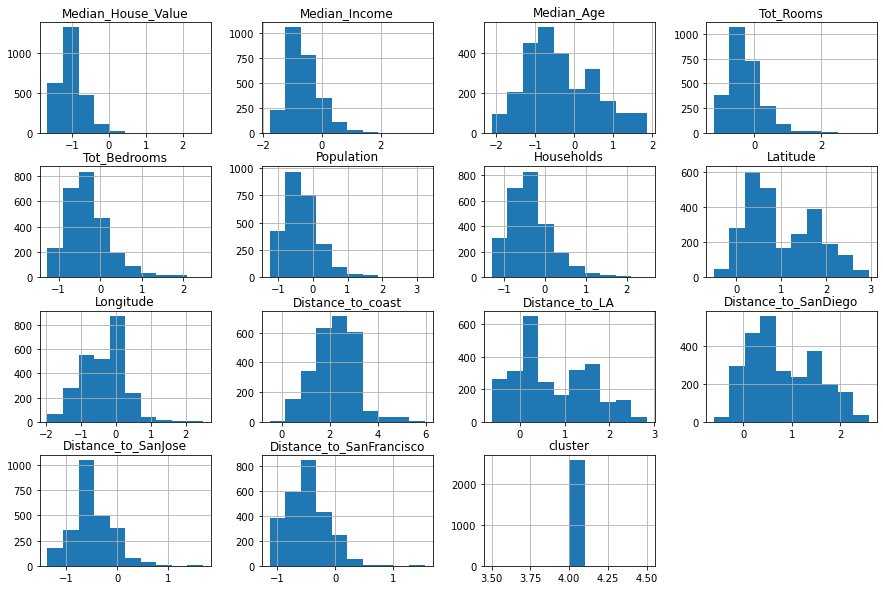

In [52]:
scaled_df_cluster4.hist(figsize=(15,10))

    Because 13 features are not possible to visualized in 2D, I will use 2 Principal Components

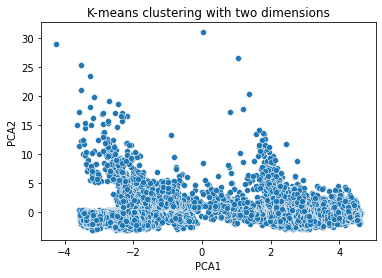

In [56]:
pca_num_components = 2
pca_model = PCA(n_components = pca_num_components)
pca_result = pca_model.fit_transform(scaled_df)
results = pd.DataFrame(pca_result, columns=['PCA1','PCA2'])

#sns.scatterplot(x="PCA1", y="PCA2", hue=scaled_df['cluster'], data=results)
sns.scatterplot(x="PCA1", y="PCA2", data=results)
plt.title('K-means clustering with two dimensions')
plt.show()


In [57]:
pca_result

array([[ 2.71780209, -2.06463226],
       [ 2.55986022,  2.84843631],
       [ 2.76715317, -1.95232623],
       ...,
       [ 3.90366167,  0.34964231],
       [ 3.95746401, -0.05404781],
       [ 3.84637983,  0.90326228]])

In [62]:
pca_model.components_

array([[-0.05946218, -0.03756267, -0.00543168, -0.01281349, -0.02072311,
        -0.03681256, -0.02208718,  0.38476097, -0.36674751,  0.12365258,
         0.36873613,  0.38565852, -0.35879392, -0.36919308,  0.380811  ],
       [-0.00335055,  0.02045734, -0.2358624 ,  0.46830617,  0.47656981,
         0.45511553,  0.47544892, -0.01783848,  0.03792386,  0.0530198 ,
        -0.01425627, -0.02434237,  0.02596449,  0.02893248,  0.23969428]])

In [61]:
pca_df = pd.DataFrame(data=pca_model.components_,columns=scaled_df.columns, index=['PC1','PC2'])

In [35]:
pca_df

,Median_House_Value,Median_Income,Median_Age,Tot_Rooms,Tot_Bedrooms,Population,Households,Latitude,Longitude,Distance_to_coast,Distance_to_LA,Distance_to_SanDiego,Distance_to_SanJose,Distance_to_SanFrancisco,cluster
PC1,-0.024946,-0.012328,0.005495,0.016696,0.006484,-0.009823,0.007098,0.362187,-0.361496,0.065757,0.352868,0.368356,-0.352956,-0.363064,0.464704
PC2,0.043590,0.054002,-0.210644,0.477602,0.482282,0.461676,0.483745,-0.046394,0.044868,-0.017207,-0.036635,-0.046607,0.035146,0.038347,0.179659


To identify the most relevant components, we look at the top values (regardless of sign). For PC1, the most relevant components are the distances to the cities. In particular, distance to SD and distance to SF. For PC2, the most relevant components are Households and Tot_Bedrooms.

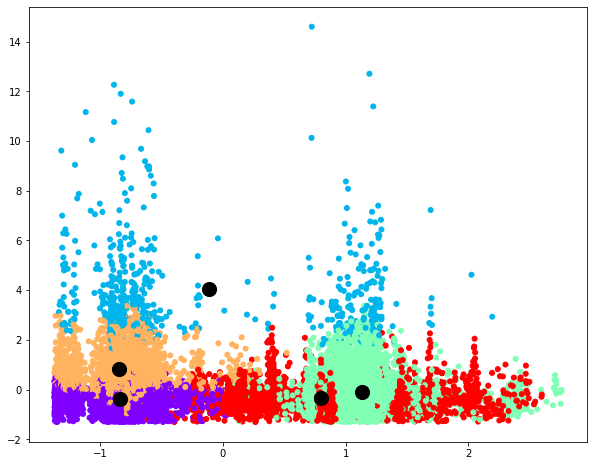

In [65]:
#let's plot the most relevant dimensions of each Principal Component against each other
plt.figure(figsize=(10,8))
plt.scatter(scaled[:,11],scaled[:,6],c=model2_predicted, s=25, cmap='rainbow')
plt.scatter(centroids2[:,11],centroids2[:,6],c='black',s=200,alpha=1)

## normalization (x-min)/(max-min)

In [39]:
scaler_minmax = MinMaxScaler() 

In [40]:
scaler_minmax.fit(df)

MinMaxScaler()

In [41]:
scaled_minmax = scaler_minmax.transform(df)

In [42]:
scaled_minmax_df = pd.DataFrame(data=scaled_minmax)

array([[<AxesSubplot:title={'center':'0'}>,
        <AxesSubplot:title={'center':'1'}>,
        <AxesSubplot:title={'center':'2'}>,
        <AxesSubplot:title={'center':'3'}>],
       [<AxesSubplot:title={'center':'4'}>,
        <AxesSubplot:title={'center':'5'}>,
        <AxesSubplot:title={'center':'6'}>,
        <AxesSubplot:title={'center':'7'}>],
       [<AxesSubplot:title={'center':'8'}>,
        <AxesSubplot:title={'center':'9'}>,
        <AxesSubplot:title={'center':'10'}>,
        <AxesSubplot:title={'center':'11'}>],
       [<AxesSubplot:title={'center':'12'}>,
        <AxesSubplot:title={'center':'13'}>, <AxesSubplot:>,
        <AxesSubplot:>]], dtype=object)

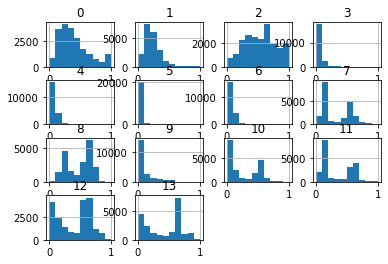

In [43]:
scaled_minmax_df.hist()

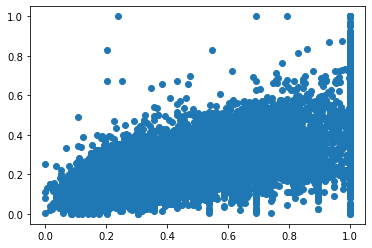

In [44]:
plt.scatter(scaled_minmax[:,0],scaled_minmax[:,1])

## k-means clustering for scaled MinMax

In [45]:
k_rng = range(1,10)
sse = []
for k in k_rng:
    k_model = KMeans(n_clusters=k)
    k_model.fit(scaled_minmax)
    sse.append(k_model.inertia_)

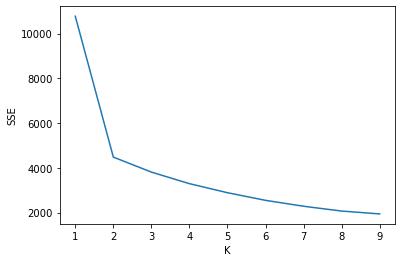

In [46]:
plt.xlabel('K')
plt.ylabel('SSE')
plt.plot(k_rng,sse)

    2 clusters is enough

In [47]:
model3 = KMeans(n_clusters=2)
model3.fit(scaled_minmax)
model3_predict = model2.predict(scaled_minmax)
centroids3 = model3.cluster_centers_

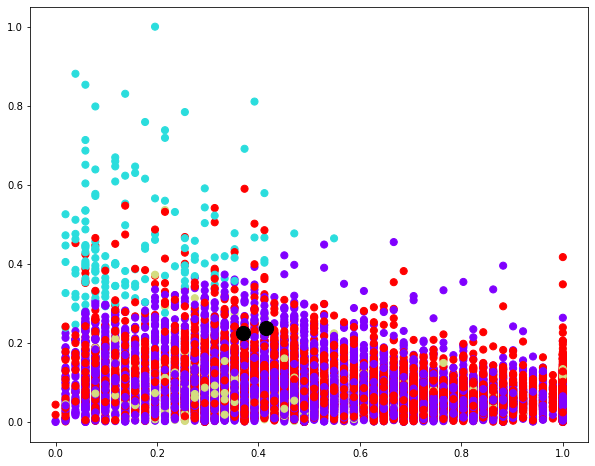

In [48]:
plt.figure(figsize=(10,8))
plt.scatter(scaled_minmax[:,2],scaled_minmax[:,6],c=model3_predict, s=50, cmap='rainbow')
plt.scatter(centroids3[:,0],centroids3[:,1],c='black',s=200,alpha=1)